# Assignment -- Walmart

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

Data Description

The company collected the transactional data of customers who purchased products from Walmart Stores during Black Friday. The dataset in walmart_data.csv has the following features:

User_ID
Product_ID
Gender - sex of a customer
Age - age in bins
Occupation (masked)
City_Category - category of the city [A, B, C]
Stay_In_Current_City_Years: number of years a customer stays in their current city
Marital_Status
Product_Category (masked)
Purchase - purchase amount
Practicalities

For simplicity, you may assume that 50% of Walmart`s customer base are Male and the other 50% are Female.

Analyze the provided data and provide insights to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.

In [1]:
import pandas as pd
import ast
from collections import defaultdict
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import gender_guesser.detector as gender
predictor = gender.Detector()

In [2]:
walmart = pd.read_csv('walmart_data.csv')

## Data Overview

In [3]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
walmart.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
walmart.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
489447,1003461,P00217442,M,36-45,0,C,0,0,1,15166
333997,1003476,P00059742,M,51-55,0,B,2,1,1,4293
171694,1002537,P00354342,M,36-45,11,B,0,0,5,5245
387569,1005641,P00062742,F,26-35,17,C,2,1,8,5926
269818,1005585,P00113042,M,26-35,4,A,4+,0,11,4513


In [6]:
walmart.shape

(550068, 10)

In [7]:
walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Find unique values in each coloumn

In [10]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nUnique Values of {column}: ", unique_values)

# Example usage
print_unique_values(walmart)


Unique Values of User_ID:  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique Values of Product_ID:  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique Values of Gender:  ['F' 'M']

Unique Values of Age:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique Values of Occupation:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique Values of City_Category:  ['A' 'C' 'B']

Unique Values of Stay_In_Current_City_Years:  ['2' '4+' '3' '1' '0']

Unique Values of Marital_Status:  [0 1]

Unique Values of Product_Category:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique Values of Purchase:  [ 8370 15200  1422 ...   135   123   613]


In [11]:
def print_nunique_values(df):
    for column in df.columns:
        unique_values = df[column].nunique()
        print(f"\nUnique Values of {column}: ", unique_values)

# Example usage
print_nunique_values(walmart)


Unique Values of User_ID:  5891

Unique Values of Product_ID:  3631

Unique Values of Gender:  2

Unique Values of Age:  7

Unique Values of Occupation:  21

Unique Values of City_Category:  3

Unique Values of Stay_In_Current_City_Years:  5

Unique Values of Marital_Status:  2

Unique Values of Product_Category:  20

Unique Values of Purchase:  18105


## Data Cleaning

In [12]:
walmart.isnull().values.any()

False

The "False" value indicates that there are no null values

In [13]:
print("Number of duplicated values: ", walmart.duplicated().sum())

Number of duplicated values:  0


In [14]:
# Removing "+" symbol
walmart.Stay_In_Current_City_Years=walmart.Stay_In_Current_City_Years.str.replace("+","")

In [15]:
walmart.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [16]:
# Assuming '+' symbols have already been removed as per your screenshot
walmart['Stay_In_Current_City_Years'] = pd.to_numeric(walmart['Stay_In_Current_City_Years'])

In [17]:

walmart.to_csv('walmart_data_new.csv', index=False)

Average amount spent by Male customers: 925344.40
Average amount spent by Female customers: 712024.39


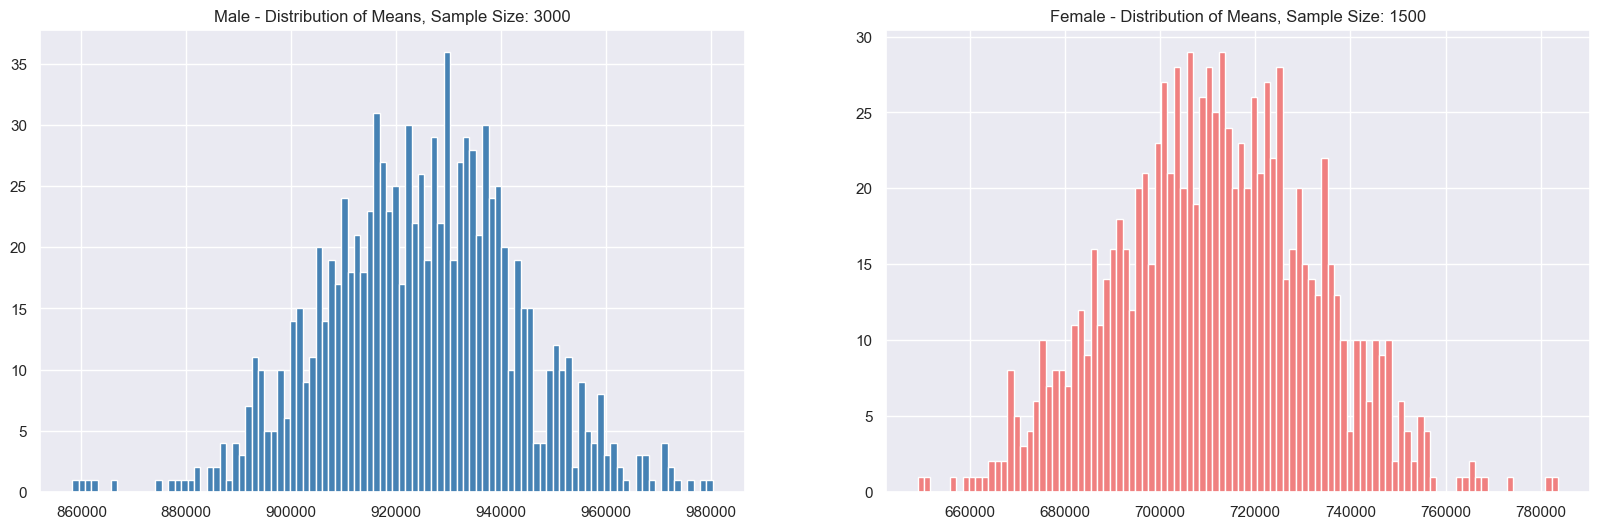



Population mean - Mean of sample means (Male): 924719.83
Population mean - Mean of sample means (Female): 711532.48

Male - Sample mean: 925344.40, Sample std: 985830.10
Female - Sample mean: 712024.39, Sample std: 807370.73


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Grouping by user and gender to calculate total amount spent per customer
amt_df = walmart.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()

# Average spend by gender
male_avg = avg_amt_df[avg_amt_df['Gender'] == 'M']['Purchase'].mean()
female_avg = avg_amt_df[avg_amt_df['Gender'] == 'F']['Purchase'].mean()

print("Average amount spent by Male customers: {:.2f}".format(male_avg))
print("Average amount spent by Female customers: {:.2f}".format(female_avg))

# Create gender-specific datasets
male_df = avg_amt_df[avg_amt_df['Gender'] == 'M']
female_df = avg_amt_df[avg_amt_df['Gender'] == 'F']

# Sampling parameters
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

# Bootstrapping to estimate sampling distribution of the mean
for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

# Plotting histograms
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=100, color='steelblue')
axis[1].hist(female_means, bins=100, color='lightcoral')
axis[0].set_title("Male - Distribution of Means, Sample Size: 3000")
axis[1].set_title("Female - Distribution of Means, Sample Size: 1500")
plt.show()

# Results
print("\n")
print("Population mean - Mean of sample means (Male): {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means (Female): {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f}, Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f}, Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

This shows that men spend more than women on average